In [1]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)
from colors import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
from matplotlib import rc

import seaborn as sns

In [3]:
init_notebook()
figsize = (7,2)
fontsize = 11
Fig.config(fontsize, figsize)

In [4]:
dataf = "../../data/famus_scaling.csv"

In [5]:
!sha256sum $dataf

4499207fb490bcc8d82e6094fef6f4043afef677d58df20c7a7e49bd0304b4e1  ../../data/famus_scaling.csv


In [6]:
df = pd.read_csv(dataf, index_col=None, header=None).T
df.index = ['ioctl overhead']
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
ioctl overhead,125421,862733,927529,1035305,1114209,1546808,1839723,1498347,1615189,1716238,1825089,1895125,2073773,2115541,2310003,2272754,2582422,2692511,2752966,2907658,3022759,3177991,3328326,3436533,3561513,3672415,3834012,3943570,4052703,4174437,4366995,4492366,4645437,4853994,4917732,5059510,5216845,5374676,5528815,5711814,5796068,5971861,6103444,6299954,6440829,6601585,6722229,6929429,7036723,7222331,7395386,7561263,7741388,7985782,7958370,8173046,9214288,8897240,9039537,9224992,9408503,9600197,9609949,10250505,6835208,9757496,9880804,10242015,10449638,10621541,10734050,10892603,10711393,11244804,11397461,11525547,11411639,11861783,12026899,11913368,12352737,12553171,12194842,12888353,13103183,12731506,13399406,12640855,13489843,12896853,13826306,13329964,14157592,13475883,14419096,13692808,14460384,13567613,14631459,14846597


In [7]:
Fig.config(16, (8, 4))

Plot saved as `plots/pathfinding/famusscaling.png`

Plot saved as `plots/pathfinding/famusscaling.png`

Using pdfcrop on `plots/pathfinding/famusscaling.png` with command `pdfcrop plots/pathfinding/famusscaling.pdf plots/pathfinding/famusscaling.pdf`

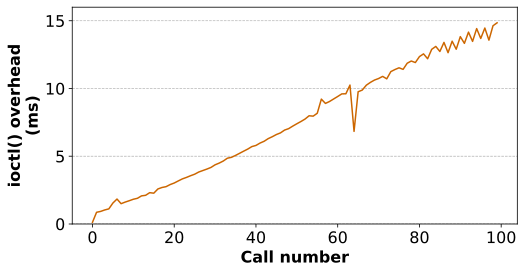

In [14]:
color=[CBcdict['Ve'], CBcdict['Bu'], CBcdict['bG'], CBcdict['rP']]
ax = (df.T/10**6).plot(**Fig.get_kwargs(bar=False, color=color))
f = Fig(ax)
f.fmt_label('Call number', 'ioctl() overhead\n(ms)')
f.fmt_grid(axis='y', linestyle='--', linewidth=0.7)
# _ = ax.set_xticks(np.arange(1, 20.1, 3))
ax.set_ylim(0,16)
ax.get_legend().remove()
# ax.set_yticks(np.arange(0, 10.1, 2))
save_fig('famusscaling')

## Extent scaling

In [21]:
import glob
import collections

In [18]:
def _make_gen(reader):
        while True:
            b = reader(2 ** 16)
            if not b: break
            yield b

### Backing file

In [59]:
backing = {}
for name in glob.glob('/tmp/xfs_bmap.*'):
    if 'backing' in name:
        id = name.split('backing')[1].replace('.txt', '')
        
        count = 0
        with open(name, "rb") as f:
            count = sum(buf.count(b"\n") for buf in _make_gen(f.raw.read))
            
        backing[int(id)] = count-1
backing_vals = list(collections.OrderedDict(sorted(backing.items())).values())


### Snapshot file

In [60]:
snapshot = {}
for name in glob.glob('/tmp/xfs_bmap.*'):
    if 'snapshot' in name:
        id = name.split('snapshot0')[1].replace('.txt', '')
        
        count = 0
        with open(name, "rb") as f:
            count = sum(buf.count(b"\n") for buf in _make_gen(f.raw.read))
            
        snapshot[int(id)] = count-1
snapshot_vals = list(collections.OrderedDict(sorted(snapshot.items())).values())

Plot saved as `plots/pathfinding/extentscaling.png`

Plot saved as `plots/pathfinding/extentscaling.png`

Using pdfcrop on `plots/pathfinding/extentscaling.png` with command `pdfcrop plots/pathfinding/extentscaling.pdf plots/pathfinding/extentscaling.pdf`

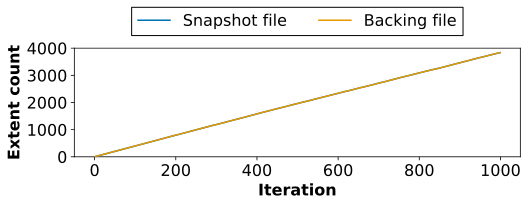

In [64]:
Fig.config(16, (8, 2))

df = pd.DataFrame({'Snapshot file': snapshot_vals, 'Backing file': backing_vals})

ax = df.plot(**Fig.get_kwargs(bar=False))
ax.set_facecolor('white')
f = Fig(ax)
f.fmt_label('Iteration', 'Extent count')
f.fmt_legend(ncol=3, y_off_scale=1, x_off_scale=1, fontsize=16)
ax.set_ylim((0, 4000))
ax.set_yticks(np.arange(0, 4001, 1000))
save_fig('extentscaling')